<a href="https://colab.research.google.com/github/lgeralas/Actividad-4/blob/main/Actividad_4_(Regresi%C3%B3n_Lineal_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
 #cargar archivo csv desde equipo 
from google.colab import files 
files.upload()

In [103]:
#Carga desde un archivo .csv sin indice
microretailer = pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx')

**Eliminación de valores nulos para valores numéricos**

In [104]:
#A través de un filtro se buscaran todas aquellas entrevistas que su tienda es de tipo tienda de conveniencia
filtro1=microretailer[microretailer["232_type_of_store"] == "Micro-restaurant (aka. fondita)"]
filtro1

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
4,3c2177cc-677b-4106-8ed2-6e50f7671a0e,"November 17, 2022",2022-11-18 13:30:19 UTC,Fernando Báez,SRID=4326;POINT(-98.201134218 19.0436743967),19.043674,-98.201134,Antojitos Tony,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6f361b49-fc33-499a-9ca0-12e1cf79ea81,"November 17, 2022",2022-11-18 13:30:18 UTC,Fernando Báez,SRID=4326;POINT(-98.2013931652 19.043971536),19.043972,-98.201393,Tortas 7 hermanos,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8ed941a0-46da-48bc-9205-67125f3ec5a1,"November 17, 2022",2022-11-18 13:30:17 UTC,Fernando Báez,SRID=4326;POINT(-98.2017912559 19.0439668372),19.043967,-98.201791,La margarita,1 Photo,Micro-restaurant (aka. fondita),...,Totalmente de acuerdo,De acuerdo,Totalmente de acuerdo,Ni de acuerdo ni en desacuerdo,De acuerdo,no,NaN,NaN,NaN,NaN
12,fb9301dd-ec43-4bc4-8f50-0e1a9dbe84ad,"November 8, 2022",2022-11-18 04:35:14 UTC,Cristian Contreras,SRID=4326;POINT(-98.2212818134 19.0417481554),19.041748,-98.221282,Cemitas Paty,1 Photo,Micro-restaurant (aka. fondita),...,Ni de acuerdo ni en desacuerdo,En desacuerdo,Totalmente en desacuerdo,En desacuerdo,Ni de acuerdo ni en desacuerdo,no,NaN,NaN,NaN,NaN
19,fa7bfebc-72bb-4fe7-8ef3-26744805dab3,"November 8, 2022",2022-11-18 04:35:10 UTC,Cristian Contreras,SRID=4326;POINT(-98.2214231845 19.0414639052),19.041464,-98.221423,Sabores de mi tierra,1 Photo,Micro-restaurant (aka. fondita),...,Totalmente en desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,De acuerdo,De acuerdo,no,NaN,NaN,NaN,NaN
21,0bfafebf-8c79-432b-904e-a24584b87f2a,"November 8, 2022",2022-11-18 04:35:08 UTC,Cristian Contreras,SRID=4326;POINT(-98.2212611005 19.0418224803),19.041822,-98.221261,El buen sazón,1 Photo,Micro-restaurant (aka. fondita),...,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,Totalmente en desacuerdo,De acuerdo,no,NaN,NaN,NaN,NaN
25,86b1ce5f-bb76-4ab3-86fb-01b243452cd5,"November 8, 2022",2022-11-18 04:35:06 UTC,Cristian Contreras,SRID=4326;POINT(-98.2218344306 19.0408630157),19.040863,-98.221834,Cazuelas el apapacho,1 Photo,Micro-restaurant (aka. fondita),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,En desacuerdo,yes,NaN,NaN,2.221904e+09,NaN
26,8ae5eaec-c3c3-4022-8c6d-7a3b73f9ebd9,"November 4, 2022",2022-11-18 04:35:05 UTC,Cristian Contreras,SRID=4326;POINT(-98.2164242172 19.0472081696),19.047208,-98.216424,Las tortas del barrio,1 Photo,Micro-restaurant (aka. fondita),...,De acuerdo,Totalmente de acuerdo,De acuerdo,De acuerdo,De acuerdo,yes,Jessica,Villalobos,2.223245e+09,NaN
28,840c4938-6e15-4004-b46f-0d179286663c,"November 8, 2022",2022-11-18 04:35:04 UTC,Cristian Contreras,SRID=4326;POINT(-98.2213921543 19.0416289221),19.041629,-98.221392,HooDoo Brown,1 Photo,Micro-restaurant (aka. fondita),...,De acuerdo,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,NaN,NaN,NaN,NaN
31,247b33fe-9dd4-4e91-8815-463e0e7bdd84,"November 8, 2022",2022-11-18 04:35:03 UTC,Cristian Contreras,SRID=4326;POINT(-98.2203426225 19.0434835111),19.043484,-98.220343,La fogata,1 Photo,Micro-restaurant (aka. fondita),...,Ni de acuerdo ni en desacuerdo,Ni de acuerdo ni en desacuerdo,Totalmente en desacuerdo,Totalmente en desacuerdo,De acuerdo,no,NaN,NaN,NaN,NaN


In [105]:
#Filtramos todos los datos númericos una vez que ya tenemos a todos los datos donde el tiepo de tienda es 'grocery'
filtros=filtro1.iloc[:,[13,14,16,21,22,29,31,33,41,42,43,44,45,49,51,56,57,58,59,60,78,90]] 
filtros

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,...,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
4,3,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3,2.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6,4.0,3,10.0,14.0,4.0,3.0,3.0,2-5%,0.0,...,0.0,NaN,NaN,NaN,NaN,4.0,0.0,NaN,3.0,30.0
12,1,1.0,1,2.0,3.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,10.0
19,2,1.0,0,3.0,2.0,1.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0
21,1,2.0,1,2.0,2.0,1.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0
25,3,2.0,2,2.0,2.0,2.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0
26,3,1.0,1,2.0,3.0,1.0,10.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,2.0,6.0
28,1,1.0,1,1.0,2.0,1.0,3.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,2.0,3.0
31,2,2.0,2,4.0,3.0,2.0,3.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0


In [106]:
#Identificar valores nulos por columna de todos los valores númericos que se encuentran en esta matriz de datos
valores_nulos=filtros.isnull().sum()
valores_nulos

97_number_of_customers_in_store                       0
268_number_fridges                                    0
104_how_many_shelves_does_the_micro_retailer_have     0
2_current_permanent_employees                        23
4_number_permanent_employees_last_year               29
103_number_own_fridges                               35
145_number_direct_competitors                        25
24_burnout                                           41
271_card_fee                                         56
272_card_days_receive_money                          47
273_platform_extra_charge                            57
274_platform_fee                                     58
275_platform_days_receive_money                      57
276_expected_days_informal_credit                    51
36_credit_default_rate                               52
315_frequency_topups                                 60
316_frequency_utility_bills                          60
317_home_deliveries                             

In [ ]:
#Para fines más rápidos se propone el llenar todos los especios nulos con la opción de llenado hacia adelante 
#Este filtrado nos ayudará a realizar las 3 regresiones lineales solicutadas, utilizando unicamente los valores númericos
filtros =filtros.fillna(method="ffill")
filtros

**Eliminación de outliers para valores numéricos**

In [108]:
#Método aplicando desviación estandar. Encuentra los valores extremos 
y=filtros
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print('Limite superior permitido', Limite_Superior)
print('Limite inferior permitido', Limite_Inferior)

Limite superior permitido 97_number_of_customers_in_store                       9.089698
268_number_fridges                                    4.279779
104_how_many_shelves_does_the_micro_retailer_have     7.914450
2_current_permanent_employees                         9.837452
4_number_permanent_employees_last_year               10.478555
103_number_own_fridges                                3.965552
145_number_direct_competitors                        17.654475
24_burnout                                            9.725242
272_card_days_receive_money                           3.055803
275_platform_days_receive_money                      14.088114
276_expected_days_informal_credit                    49.513598
36_credit_default_rate                                5.126333
315_frequency_topups                                       NaN
316_frequency_utility_bills                                NaN
317_home_deliveries                                  47.845441
62_frequency_only_services   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
#Obtenemos datos limpiosy los outliers se convertiran en nulos en el Dataframe
filtros=filtros[(y<=Limite_Superior)&(y>=Limite_Inferior)]
filtros

In [ ]:
#Reemplazar valores átipicos (nulos) del dataframe con la opción de llenado hacia adelante
filtros=filtros.fillna(round(filtros.mean(),1))
filtros

**Regresión lineal para valores númericos**                        
Una vez que ya hemos  filtrado, eliminado nulos y eliminado ouliers, se procederá a realizar tres diferentes regresiones lineales con ayuda de los valores númericos del Dataframe que ya ha sido limpiado

- Correlación existente entre cantidad de estantes y productos (variables independientes) y número de competencia (variable dependiente)

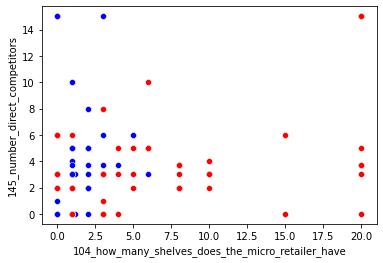

In [111]:
#Se grafican mapas de dispersión de las variables de estantes, y cantidad de productos perecederos en el negocio. para saber que correlación guerda con el número de competidores"
from turtle import color

sns.scatterplot(x='104_how_many_shelves_does_the_micro_retailer_have', y='145_number_direct_competitors', color="blue", data=filtros)
sns.scatterplot(x='163_number_high_perishable_products', y='145_number_direct_competitors', color="red", data=filtros)


In [112]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtros[['104_how_many_shelves_does_the_micro_retailer_have','163_number_high_perishable_products']]
Var_Dep= filtros['145_number_direct_competitors']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['104_how_many_shelves_does_the_micro_retailer_have',
        '163_number_high_perishable_products'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.24942108, 0.199453  ]),
 '_residues': 527.8557673250258,
 'rank_': 2,
 'singular_': array([46.91463951,  9.80241123]),
 'intercept_': 1.809260039812916}

In [113]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
coef_Deter=model.score(Vars_Indep,Var_Dep)

In [114]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.38804377018657465

- Correlación existente entre la catidad de clientes en la tienda y entregas a domicilio (variables independientes) y la cantidad de cansancio que presentan los trabajadores (variable dependiente)

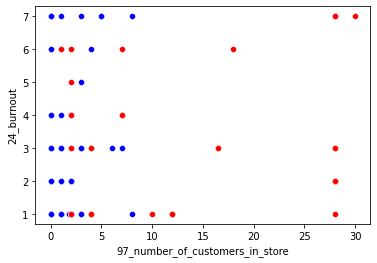

In [118]:
#Se grafican mapas de dispersión de las variables de clientes y las entregas a domicilio en el negocio, para saber que correlación guarda con el cansancia presente en los trabajadores"
from turtle import color

sns.scatterplot(x='97_number_of_customers_in_store', y='24_burnout', color="blue", data=filtros)
sns.scatterplot(x='317_home_deliveries', y='24_burnout', color="red", data=filtros)

In [117]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtros[['97_number_of_customers_in_store','317_home_deliveries']]
Var_Dep= filtros['24_burnout']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['97_number_of_customers_in_store', '317_home_deliveries'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.08646894, 0.05834077]),
 '_residues': 261.2358263895812,
 'rank_': 2,
 'singular_': array([78.97741253, 15.22107013]),
 'intercept_': 1.903515067241456}

In [119]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
coef_Deter=model.score(Vars_Indep,Var_Dep)
coef_Deter

0.08332945883531984

In [120]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2886684236893946

- Analizar la correlación entre los estantes presentes en la tienda y el número de refrigeradores (variables independientes) y el número de clientes dentro de la misma (variable dependiente)

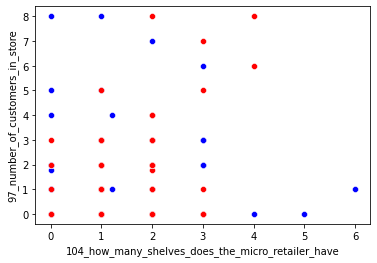

In [121]:
#Se grafican mapas de dispersión de las variables de estantes y refrigeradores, para saber que correlación guarda con el la cantidad de clientes"
from turtle import color

sns.scatterplot(x='104_how_many_shelves_does_the_micro_retailer_have', y='97_number_of_customers_in_store', color="blue", data=filtros)
sns.scatterplot(x='268_number_fridges', y='97_number_of_customers_in_store', color="red", data=filtros)

In [122]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= filtros[['104_how_many_shelves_does_the_micro_retailer_have','268_number_fridges']]
Var_Dep= filtros['97_number_of_customers_in_store']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Verificamos la función relacionada al modelo
type(model)

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['104_how_many_shelves_does_the_micro_retailer_have',
        '268_number_fridges'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.08095999,  0.9007377 ]),
 '_residues': 193.12057730402466,
 'rank_': 2,
 'singular_': array([9.82731606, 6.95422119]),
 'intercept_': 0.466230951870491}

In [123]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
coef_Deter=model.score(Vars_Indep,Var_Dep)
coef_Deter

0.17001405093694888

In [124]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.41232760147357206